# Gradient Descent Implementation

In [1]:
import numpy as np
import pandas as pd

housing=pd.read_csv('Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
#converting yes to 1 and no to 0
housing['mainroad']=housing['mainroad'].map({'yes':1, 'no':0})
housing['guestroom']=housing['guestroom'].map({'yes':1, 'no':0})
housing['basement']=housing['basement'].map({'yes':1, 'no':0})
housing['hotwaterheating']=housing['hotwaterheating'].map({'yes':1, 'no':0})
housing['parking']=housing['parking'].map({'yes':1, 'no':0})
housing['airconditioning'] = housing['airconditioning'].map({'yes': 1, 'no': 0})
housing['prefarea'] = housing['prefarea'].map({'yes': 1, 'no': 0})

In [6]:
#converting the furnishststutus to binary column usig get_dummies
status=pd.get_dummies(housing['furnishingstatus'],drop_first=True)
housing=pd.concat([housing,status],axis=1)
housing.drop(['furnishingstatus'], axis=1, inplace=True)

In [7]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,NaN,NaN,NaN,0,1,NaN,1,0,0
1,12250000,8960,4,4,4,NaN,NaN,NaN,0,1,NaN,0,0,0
2,12250000,9960,3,2,2,NaN,NaN,NaN,0,0,NaN,1,1,0
3,12215000,7500,4,2,2,NaN,NaN,NaN,0,1,NaN,1,0,0
4,11410000,7420,4,1,2,NaN,NaN,NaN,0,1,NaN,0,0,0


In [8]:
#normalising the data
housing=(housing-housing.mean())/housing.std()
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,4.562174,1.045766,1.402131,1.420507,1.376952,NaN,NaN,NaN,-0.219063,1.471267,NaN,1.803284,-0.844113,-0.69579
1,4.000809,1.755397,1.402131,5.400847,2.529700,NaN,NaN,NaN,-0.219063,1.471267,NaN,-0.553526,-0.844113,-0.69579
2,4.000809,2.216196,0.047235,1.420507,0.224204,NaN,NaN,NaN,-0.219063,-0.678439,NaN,1.803284,1.182502,-0.69579
3,3.982096,1.082630,1.402131,1.420507,0.224204,NaN,NaN,NaN,-0.219063,1.471267,NaN,1.803284,-0.844113,-0.69579
4,3.551716,1.045766,1.402131,-0.569663,0.224204,NaN,NaN,NaN,-0.219063,1.471267,NaN,-0.553526,-0.844113,-0.69579


In [9]:
#simple Linear Regression
#assign a feature variable x
X=housing['area']
#assign a response variable Y
Y=housing['price']


In [10]:
#import seaborn
import seaborn as sns 
%matplotlib inline

C:\Users\Saurabh Anand\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


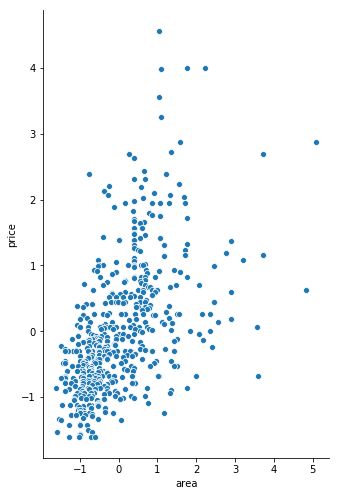

In [11]:
#Visualize the relationship between feature variable and response variable using scatter plot 
sns.pairplot(housing,x_vars='area',y_vars='price',size=7,aspect=0.7,kind='scatter')

For linear Regression we use cost function know as mean square error

Now to apply Gradient Descent from scratch we need to convert X and Y to numpy arrays

In [12]:
import numpy as np
x=np.array(X)
y=np.array(Y)

In [13]:
#implement the gradient descent function 
def gradient(x,y,m_current=0,c_current=0,iters=1000,learning_rate=0.01):
    N=float(len(y))
    gd_df=pd.DataFrame(columns=['m_current','c_current','cost']) #creating a table 
    for i in range(iters):
        y_current=(m_current*x)+c_current #y=mx+c
        cost=sum([data**2 for data in (y-y_current)])/N #calculating the cost
        m_gradient=-(2/N)*sum(x*(y-y_current)) #calculating the gradient
        c_gradient=-(2/N)*sum(y-y_current) #calculating the intercept
        m_current=m_current-(learning_rate*m_gradient) #we will keep decreasing the m_current values till we get minimum
        c_current=c_current-(learning_rate*c_gradient)
        gd_df.loc[i]=[m_current,c_current,cost]
    return(gd_df)

In [14]:
gradients=gradient(x,y)
gradients

,m_current,c_current,cost
0,0.010700,3.731979e-18,0.998165
1,0.021187,1.981697e-17,0.986830
2,0.031464,2.998621e-17,0.975943
3,0.041536,2.656387e-17,0.965486
4,0.051407,2.433120e-17,0.955442
5,0.061081,2.840541e-17,0.945796
6,0.070562,3.605678e-17,0.936530
7,0.079854,3.760499e-17,0.927631
8,0.088960,4.073398e-17,0.919084
9,0.097884,5.728343e-17,0.910875


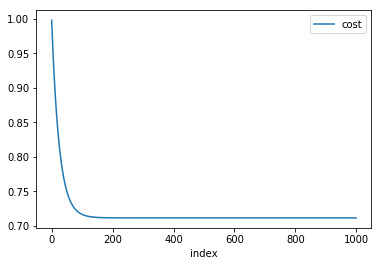

In [15]:
#plotting cost agaonst number of iterations
gradients.reset_index().plot.line(x='index',y=['cost'])


# Multiple Regression: Applying Gradient for multiple features

In [16]:
#assigning feature variable x
X=housing[['area','bedrooms']]

#assigining response variable y
Y=housing['price']


In [18]:
#adding a column of 1s as an intercept to X
#The intercept column is needed for convinient matrix representation of cost function
X['intercept']=1
X=X.reindex_axis(['intercept','area','bedrooms'], axis=1)
X.head()

C:\Users\Saurabh Anand\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Saurabh Anand\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  after removing the cwd from sys.path.


,intercept,area,bedrooms
0,1,1.045766,1.402131
1,1,1.755397,1.402131
2,1,2.216196,0.047235
3,1,1.082630,1.402131
4,1,1.045766,1.402131


In [19]:
#convert the X and Y to arrays 
import numpy as np
x=np.array(X)
y=np.array(Y)


In [20]:
#theta is a vector representing coefficient (intercepts,area, bedrooms)
theta=np.matrix(np.array([0,0,0]))
alpha=0.01
iterations=1000


In [21]:
#define cost function 
#takes in theta (current values of coefficient b0,b1,b2), x and y
#return total cost at current b0,b1,b2

def compute_cost(x,y,theta):
    return np.sum(np.square(np.matmul(x,theta)-y))/(2*len(y))


In [22]:
#gradient descent function 
#takes current x,y,learning rate alpha,num_iters
#returns cost
def gradient_descent_multi(x,y,theta,alpha,iterations):
    theta=np.zeros(x.shape[1])
    m=len(x)
    gdm_df=pd.DataFrame(columns=['Bets','cost'])
    
    for i in range(iterations):
        gradient = (1/m) * np.matmul(x.T, np.matmul(x, theta) - y)
        theta = theta - alpha * gradient
        cost = compute_cost(x, y, theta)
        gdm_df.loc[i] = [theta,cost]

    return gdm_df

In [25]:
gradient_descent_multi(x,y,theta,alpha,iterations)

,Bets,cost
0,"[3.1126986818848428e-18, 0.005350138644096795,...",0.494906
1,"[4.929797650629136e-18, 0.010641328951860776, ...",0.490824
2,"[6.608373379603684e-18, 0.015874226967184053, ...",0.486834
3,"[8.40917549661036e-18, 0.021049481374934613, 0...",0.482935
4,"[9.745517339094953e-18, 0.02616773358401025, 0...",0.479124
5,"[1.1558542094904842e-17, 0.03122961780945073, ...",0.475400
6,"[1.3811581847630389e-17, 0.03623576115361899, ...",0.471759
7,"[1.483013508123145e-17, 0.04118678368646186, 0...",0.468202
8,"[1.7115768537432233e-17, 0.04608329852486085, ...",0.464724
9,"[2.0012533933793652e-17, 0.05092591191108338, ...",0.461326


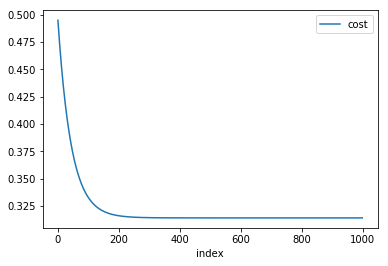

In [26]:
gradient_descent_multi(x, y, theta, alpha, iterations).reset_index().plot.line(x='index', y=['cost'])